In [37]:
import pandas
import numpy
import seaborn
from matplotlib import pyplot as plt

import os.path
import math

In [122]:
def load_results(path):
    df = pandas.read_csv(path)
    
    return df

results_path = './hear2021-results.csv'
results = load_results(results_path)
results

,team_name,model,task,test_score,test_score_std,primary_score,error,embedding_dim,embedding_secs,prediction_gpu_device_name,...,test_mAP,test_d_prime,test_top1_acc,test_event_onset_200ms_fms,test_segment_1s_er,test_pitch_acc,test_chroma_acc,test_event_onset_50ms_fms,test_event_onset_offset_50ms_20perc_fms,test_segment_1s_er_error_rate
0,NTU-GURA,fusion_cat_xwc,vox_lingua_top10-hear2021-full,0.720185,0.021387,test_top1_acc,NaN,3072.0,80.581544,A100-SXM4-40GB,...,NaN,NaN,0.720185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NTU-GURA,fusion_hubert_xlarge,vox_lingua_top10-hear2021-full,0.713968,0.031898,test_top1_acc,NaN,1280.0,50.104522,A100-SXM4-40GB,...,NaN,NaN,0.713968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NTU-GURA,cat_hubert_wav2vec2,vox_lingua_top10-hear2021-full,0.705794,0.033276,test_top1_acc,NaN,2048.0,52.759543,A100-SXM4-40GB,...,NaN,NaN,0.705794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NTU-GURA,fusion_wav2vec2,vox_lingua_top10-hear2021-full,0.705778,0.033470,test_top1_acc,NaN,1024.0,27.581720,A100-SXM4-40GB,...,NaN,NaN,0.705778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NTU-GURA,avg_hubert_wav2vec2,vox_lingua_top10-hear2021-full,0.690357,0.032273,test_top1_acc,NaN,1024.0,49.223417,A100-SXM4-40GB,...,NaN,NaN,0.690357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,CP-JKU,base2levelmel,beehive_states-v2-full,NaN,NaN,test_aucroc,>= 20 A100-GPU hours to embed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,HEAR,wav2vec2,beehive_states-v2-full,NaN,NaN,test_aucroc,>= 40GB A100 GPU memory to embed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,ibkuroyagi,hearline,beehive_states-v2-full,NaN,NaN,test_aucroc,>= 40GB A100 GPU memory to embed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,AMAAI,my_model,beehive_states-v2-full,NaN,NaN,test_aucroc,>= 40GB A100 GPU memory to embed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['mridangam_stroke-v1.5-full', 'beijing_opera-v1.0-hear2021-full',
       'gunshot_triangulation-v1.0-full', 'mridangam_tonic-v1.5-full',
       'speech_commands-v0.0.2-full', 'tfds_gtzan_music_speech-1.0.0-full',
       'speech_commands-v0.0.2-5h', 'beehive_states-v2-full',
       'nsynth_pitch-v2.2.3-50h', 'esc50-v2.0.0-full',
       'libricount-v1.0.0-hear2021-full', 'dcase2016_task2-hear2021-full',
       'nsynth_pitch-v2.2.3-5h', 'vox_lingua_top10-hear2021-full',
       'tfds_gtzan-1.0.0-full', 'fsd50k-v1.0-full', 'tfds_crema_d-1.0.0-full',
       'vocal_imitation-v1.1.3-full'],
      dtype='object', name='task')

In [34]:
task_order

,test_score,test_score_std,embedding_dim,embedding_secs,test_aucroc,test_mAP,test_d_prime,test_top1_acc,test_event_onset_200ms_fms,test_segment_1s_er,test_pitch_acc,test_chroma_acc,test_event_onset_50ms_fms,test_event_onset_offset_50ms_20perc_fms,test_segment_1s_er_error_rate
task,,,,,,,,,,,,,,,
mridangam_stroke-v1.5-full,0.921778,0.009215,1904.142857,40.251856,NaN,NaN,NaN,0.921778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beijing_opera-v1.0-hear2021-full,0.919106,0.049163,1873.793103,3.692754,NaN,NaN,NaN,0.919106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gunshot_triangulation-v1.0-full,0.854782,0.143589,1873.793103,1.397663,NaN,NaN,NaN,0.854782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mridangam_tonic-v1.5-full,0.805621,0.022769,1904.142857,41.968779,NaN,NaN,NaN,0.805621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speech_commands-v0.0.2-full,0.734405,NaN,1873.793103,NaN,NaN,NaN,NaN,0.734405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tfds_gtzan_music_speech-1.0.0-full,0.718479,0.129140,1873.793103,14.179455,NaN,NaN,NaN,0.718479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speech_commands-v0.0.2-5h,0.706833,NaN,1873.793103,NaN,NaN,NaN,NaN,0.706833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beehive_states-v2-full,0.621019,NaN,1365.818182,305.279176,0.621019,NaN,NaN,0.548611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nsynth_pitch-v2.2.3-50h,0.614252,NaN,1873.793103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.614252,0.657661,NaN,NaN,NaN


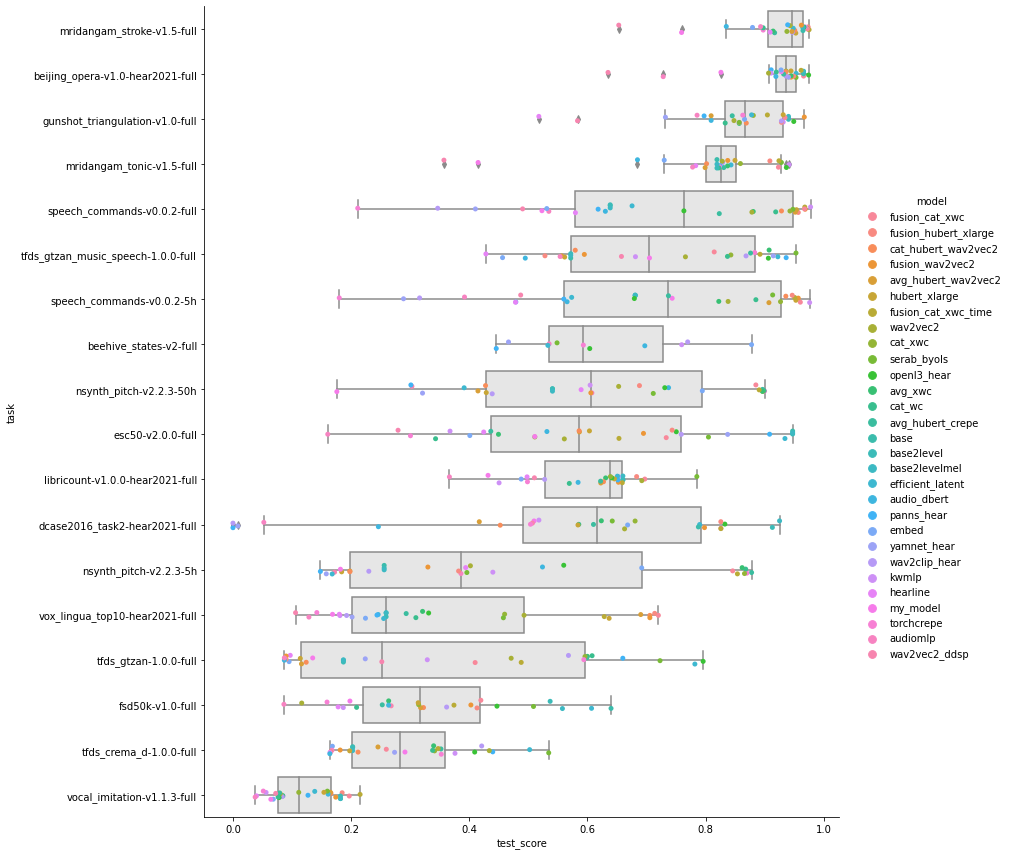

In [42]:
#r = results.sort_values('test_score', ascending=False)
r = results.copy()
task_order = r.groupby('task').mean().sort_values('test_score', ascending=False)

#fig, ax = plt.subplots(1, figsize=(12, 12))
#seaborn.stripplot(ax=ax, data=r, x='test_score', y='task', hue='model', orient='h', order=task_order.index)
#seaborn.boxplot(ax=ax, data=r, x='test_score', y='task', color='0.9', order=task_order.index)

g = seaborn.catplot(data=r, kind='strip', x='test_score', y='task', hue='model', height=12, orient='h', order=task_order.index)
g.map(seaborn.boxplot, data=r, x='test_score', y='task', color='0.9', order=task_order.index)


In [117]:
#results['test_score'].fillna(0.0, inplace=True)


In [118]:
results[results['test_score'].isna()]

,team_name,model,task,test_score,test_score_std,primary_score,error,embedding_dim,embedding_secs,prediction_gpu_device_name,...,test_mAP,test_d_prime,test_top1_acc,test_event_onset_200ms_fms,test_segment_1s_er,test_pitch_acc,test_chroma_acc,test_event_onset_50ms_fms,test_event_onset_offset_50ms_20perc_fms,test_segment_1s_er_error_rate


In [133]:
r = results.copy()
r['test_score'].fillna(0.0, inplace=True)
pct = r.set_index(['model', 'task']).groupby('task')['test_score'].rank(pct=True)
pct.head(5)

model                 task                          
fusion_cat_xwc        vox_lingua_top10-hear2021-full    1.000000
fusion_hubert_xlarge  vox_lingua_top10-hear2021-full    0.965517
cat_hubert_wav2vec2   vox_lingua_top10-hear2021-full    0.931034
fusion_wav2vec2       vox_lingua_top10-hear2021-full    0.896552
avg_hubert_wav2vec2   vox_lingua_top10-hear2021-full    0.862069
Name: test_score, dtype: float64

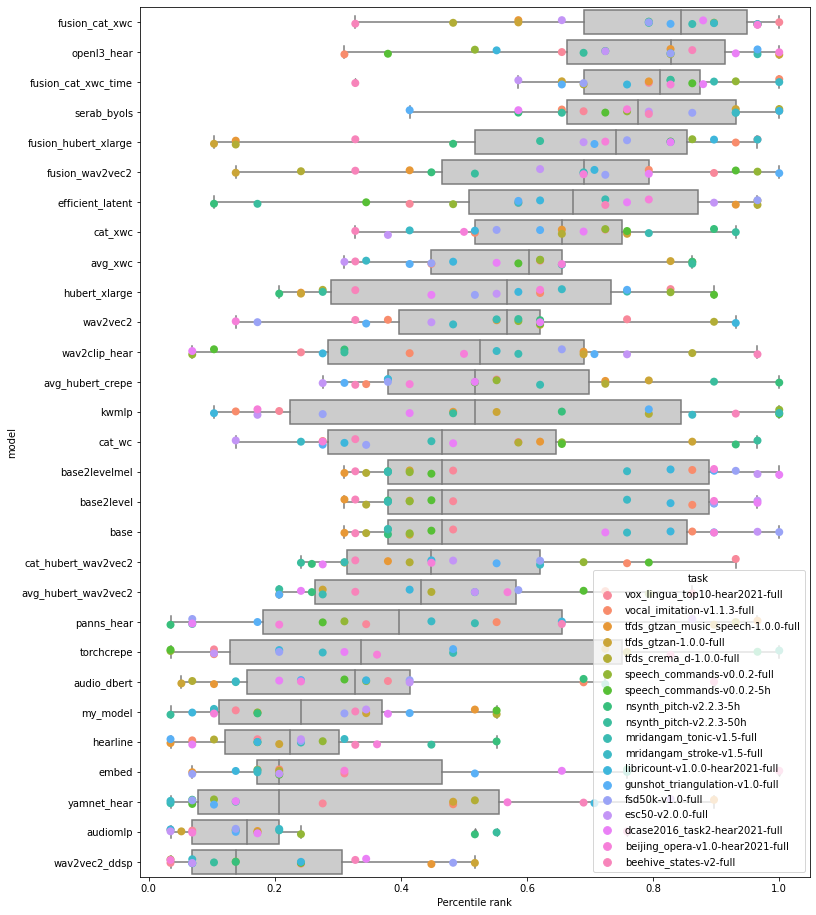

In [175]:
fig, ax = plt.subplots(1, figsize=(12, 16))
model_pct_order = pct.groupby('model').median().sort_values(ascending=False)
#seaborn.scatterplot(ax=ax, data=r.reset_index(), y='model', x='test_score', hue='task')
# FIXME: have marker differences also
seaborn.stripplot(ax=ax, data=pct.reset_index(), y='model', x='test_score', order=model_pct_order.index, hue='task', s=8.0)
seaborn.boxplot(ax=ax, data=pct.reset_index(), y='model', x='test_score', order=model_pct_order.index, color='0.8')
ax.set_xlabel('Percentile rank')

savefig(fig, 'models-precentile-score-error-zero.png')

In [171]:
def savefig(fig, path, **kwargs):
    fig.savefig(path, bbox_inches='tight', pad_inches=0, transparent=False,  facecolor='white', **kwargs)
    



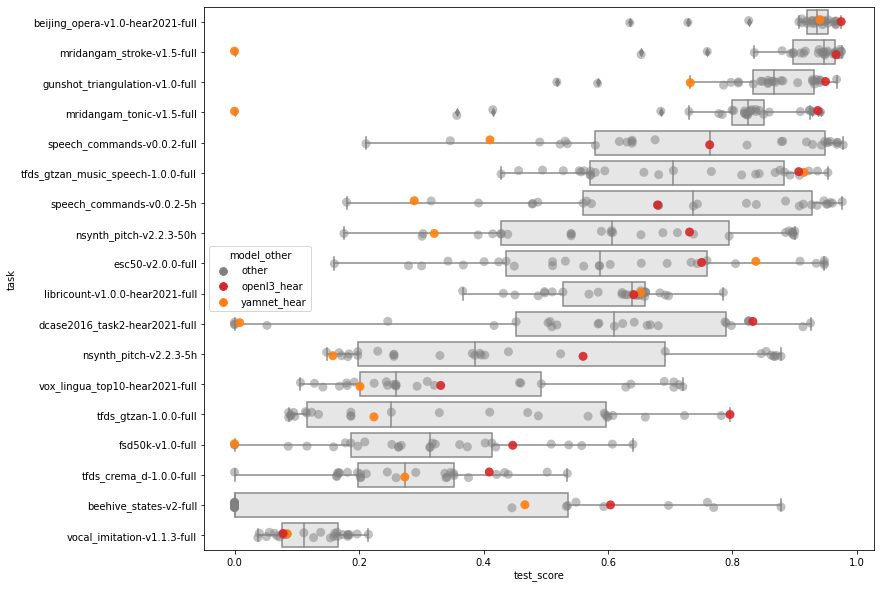

In [172]:


r = results.copy()
r['test_score'].fillna(0.0, inplace=True)
r['model_other'] = r['model'].copy()
r.loc[~r['model_other'].isin(['yamnet_hear', 'openl3_hear']), 'model_other'] = 'other'
r['model_other'].value_counts()

task_order = r.groupby('task').mean().sort_values('test_score', ascending=False)

palette = {
    'yamnet_hear': 'C1',
    'openl3_hear': 'C3',
    'other': 'gray',
}


fig, ax = plt.subplots(1, figsize=(12, 10))

def strip(data, **kwargs):
    seaborn.stripplot(ax=ax,
                      data=data,
                      x='test_score',
                      y='task',
                      hue='model_other',
                      orient='h',
                      s=9.0,
                      order=task_order.index,
                      palette=palette,
                      **kwargs,
    )
    
seaborn.boxplot(ax=ax, data=r, x='test_score', y='task', color='0.9', order=task_order.index)
strip(data=r[r['model_other'] == 'other'], alpha=0.5)
strip(data=r[r['model_other'] != 'other'], alpha=0.9)


#g = seaborn.catplot(data=r, kind='strip', x='test_score', y='task', hue='model_other', s=8.0, alpha=0.8, jitter=0.2, height=12, orient='h', order=task_order.index, palette=palette)
#g.map(seaborn.boxplot, data=r, x='test_score', y='task', color='0.9', order=task_order.index)

savefig(fig, 'task-results-openl3-yamnet.png')
